In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
from scipy.linalg import eig
from sklearn import metrics
from sklearn.datasets import make_blobs, make_circles, make_moons, make_gaussian_quantiles
from sklearn.cluster import AgglomerativeClustering, DBSCAN, SpectralClustering
from sklearn.preprocessing import StandardScaler
import sklearn

In [2]:
data = np.load("test_data.npy", allow_pickle = True ).item ()
# Data is a DICT with keys --- " data " and " labels "
X, labels = data["data"], data["labels"]

In [3]:
#Helper function to plot

def plot_clusters (data, true_labels = None, cluster_labels = None, title_true = "True clusters", title_cluster = "Agglomerative Clustering"):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 5))
    ax1.scatter (data[:, 0], data[:, 1], c = true_labels) 
    ax1.set_title(title_true)
    if cluster_labels is not None:
        ax2.scatter(data[:, 0], data[:, 1], c=cluster_labels) 
        ax2.set_title(title_cluster)
    plt.show()

In [4]:
seed = 0

In [5]:
X[0:5], labels[0:5]

(array([[ 0.54672236,  0.27927909, -2.68604296,  2.        ],
        [ 0.28032095, -0.7561507 , -1.11590602,  2.        ],
        [ 0.67632722,  0.83459768,  0.57416322,  2.        ],
        [ 1.20293528,  1.39106876, -2.9991174 ,  2.        ],
        [ 0.71185058,  1.56166453, -2.51449182,  2.        ]]),
 array([2, 1, 0, 2, 2], dtype=int64))

In [6]:
X.shape, labels.shape

((500, 4), (500,))

In [7]:
X_scaled = StandardScaler().fit_transform(X)

In [8]:
'''
pca = PCA(n_components=2)
X_ = pca.fit_transform(X_scaled)
'''

'\npca = PCA(n_components=2)\nX_ = pca.fit_transform(X_scaled)\n'

In [9]:
'''
# Function to get the principal components 
def get_principal_comps (X, Vt, n):
    # X: data matrix, Vt: right singular matrix
    PC = X@(Vt.T)
    return PC[:,:n]

# SVD
U,S,Vt = np.linalg.svd(X_scaled)

n = 2
X_ = get_principal_comps(X_scaled, Vt, n)
'''

'\n# Function to get the principal components \ndef get_principal_comps (X, Vt, n):\n    # X: data matrix, Vt: right singular matrix\n    PC = X@(Vt.T)\n    return PC[:,:n]\n\n# SVD\nU,S,Vt = np.linalg.svd(X_scaled)\n\nn = 2\nX_ = get_principal_comps(X_scaled, Vt, n)\n'

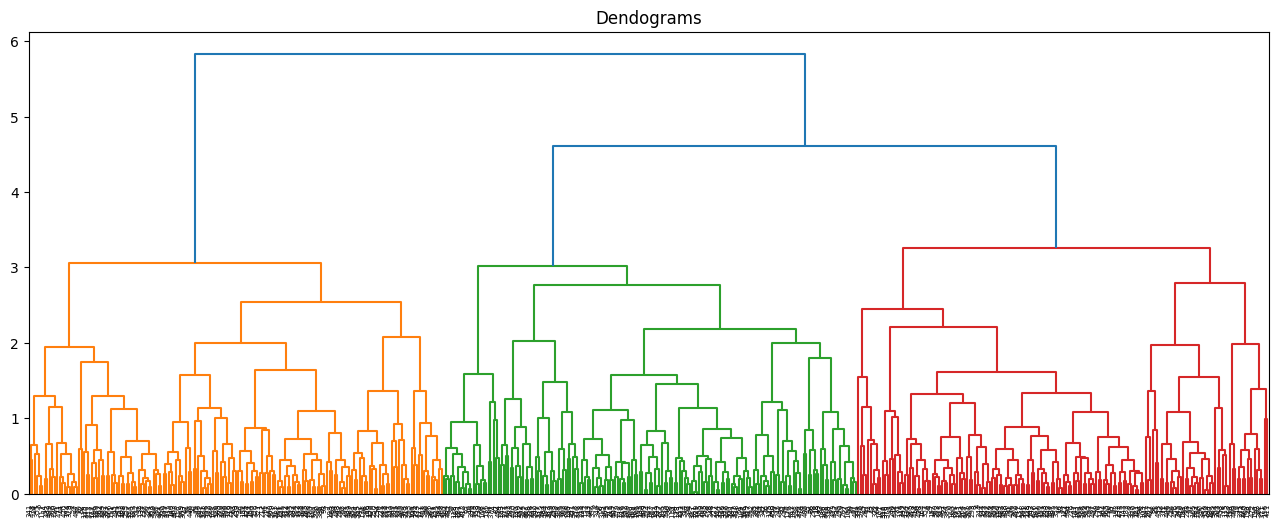

In [10]:
plt.figure(figsize = (16,6))
plt.title('Dendograms')
Z = shc.linkage(X_scaled,method = 'complete')
dend = shc.dendrogram(Z)

## 1. Using the given test data report the best rand index and mutual information score for all the above discussed algorithms. Also report the silhouette score.

## Agglomerative Clustering

In [11]:
agglo_cluster = AgglomerativeClustering(n_clusters = 3, metric = 'euclidean', linkage = 'complete') 
agglo_cluster.fit(X_scaled)

AgglomerativeClustering(linkage='complete', metric='euclidean', n_clusters=3)

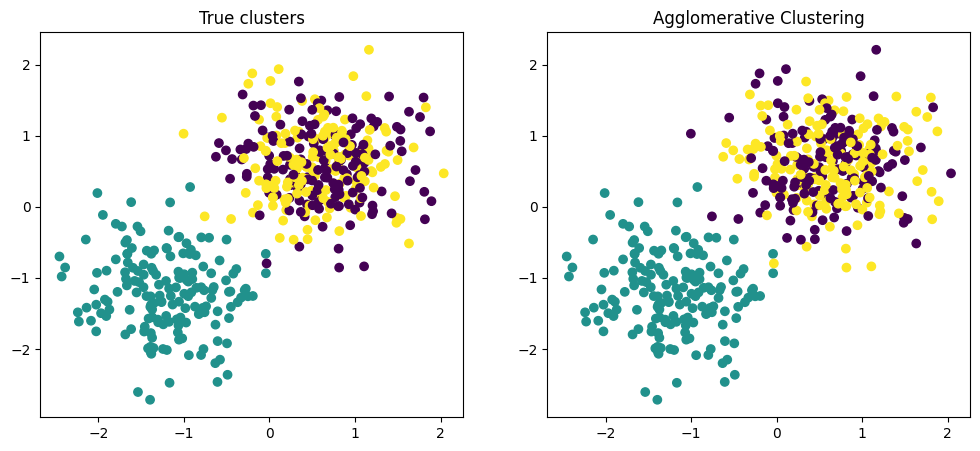

In [12]:
plot_clusters(X_scaled,labels, agglo_cluster.labels_, title_cluster = 'Agglomerative Clustering')

In [13]:
X_, pred_labels, true_labels = X_scaled, agglo_cluster.labels_, labels

print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X_, pred_labels))
print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(true_labels, pred_labels))
print("Adjusted Mutual Information: %0.3f" % metrics.adjusted_mutual_info_score(true_labels, pred_labels, average_method='arithmetic'))

Silhouette Coefficient: 0.588
Adjusted Rand Index: 1.000
Adjusted Mutual Information: 1.000


## Agglomerative clustering achieves a perfect clustering result, as both the Rand Index and Mutual Information Score reach a maximum value of 1. We obtain a silhouette coefficient of 0.588. 

## DBSCAN

In [14]:
dbscan_cluster = DBSCAN(eps=0.75, min_samples=20)
dbscan_cluster.fit(X_scaled)

DBSCAN(eps=0.75, min_samples=20)

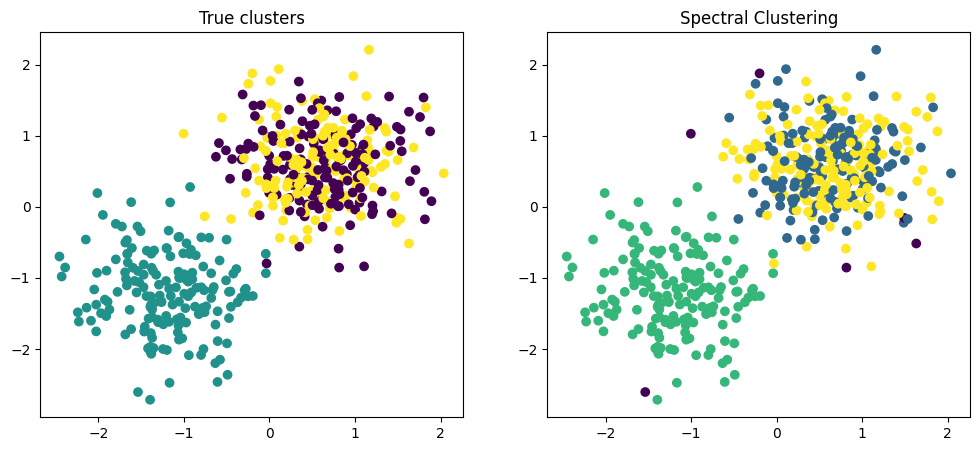

In [15]:
plot_clusters(X_scaled,labels,dbscan_cluster.labels_, title_cluster="Spectral Clustering")

In [16]:
X_, pred_labels, true_labels = X_scaled, dbscan_cluster.labels_, labels

print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X_, pred_labels))
print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(true_labels, pred_labels))
print("Adjusted Mutual Information: %0.3f" % metrics.adjusted_mutual_info_score(true_labels, pred_labels, average_method='arithmetic'))

Silhouette Coefficient: 0.574
Adjusted Rand Index: 0.976
Adjusted Mutual Information: 0.957


## Once again we get a very good clustering result, as both the Rand Index and Mutual Information Score reach values above 0.95. A Silhouette score of 0.574 is obtained. However we obtain four clusters here.

## Spectral Clustering

In [17]:
spectral_cluster = SpectralClustering(n_clusters=3, affinity='nearest_neighbors')
spectral_cluster.fit(X_scaled)

SpectralClustering(affinity='nearest_neighbors', n_clusters=3)

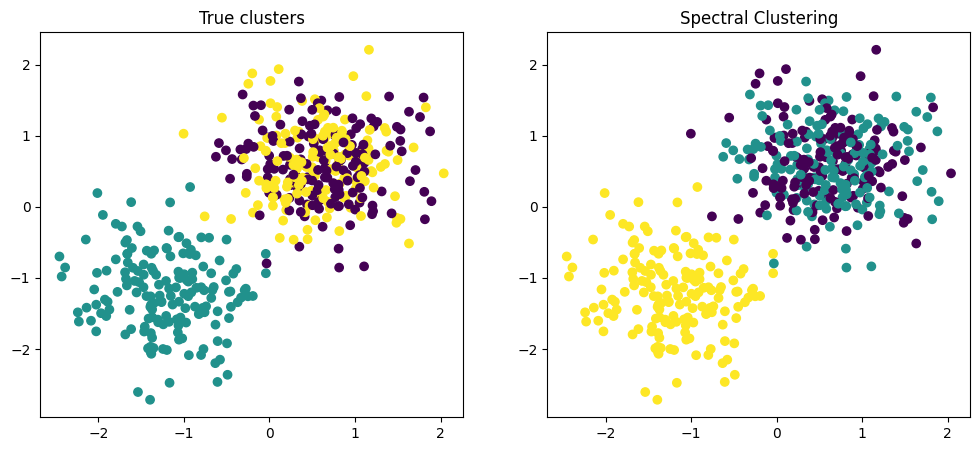

In [18]:
plot_clusters(X_scaled,labels, spectral_cluster.labels_, title_cluster="Spectral Clustering")

In [19]:
X_, pred_labels, true_labels = X_scaled, spectral_cluster.labels_, labels

print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X_, pred_labels))
print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(true_labels, pred_labels))
print("Adjusted Mutual Information: %0.3f" % metrics.adjusted_mutual_info_score(true_labels, pred_labels, average_method='arithmetic'))

Silhouette Coefficient: 0.588
Adjusted Rand Index: 1.000
Adjusted Mutual Information: 1.000


## Once again we get a very good clustering result, as both the Rand Index and Mutual Information Score of 1 is obtained. A Silhouette score of 0.588 is obtained.

## 2. Explain the ambiguity in Silhoutte Scores.

### Ambiguity in Silhoutte Scores is based on the capabilities of the model and the structure of the dataset.

### DBSCAN (Density-Based Spatial Clustering of Applications with Noise):

Moon Dataset: DBSCAN can work well for the moon-shaped dataset because it's capable of identifying clusters of arbitrary shapes and can handle datasets with varying densities. However, you'll need to tune the eps and min_samples hyperparameters to adapt to the specific moon dataset.

Blob Dataset: DBSCAN can handle blob-like datasets effectively, as long as you set appropriate hyperparameters. It can identify clusters of varying shapes and sizes, making it a good choice for this type of data.

Circle Dataset: DBSCAN may not be the best choice for a perfect circle dataset because it primarily looks for dense regions separated by areas of lower density. It might struggle to capture the circular structure unless you preprocess the data to convert it into a more density-based representation.

### Agglomerative Clustering:

Moon Dataset: Agglomerative clustering can work well for moon-shaped datasets, but you need to choose the linkage method carefully (e.g., ward, complete) and adjust the number of clusters to achieve good results.

Blob Dataset: Agglomerative clustering is versatile and can handle blob-like datasets reasonably well, provided you tune the hyperparameters appropriately.

Circle Dataset: Agglomerative clustering can also work for circle datasets if you choose the linkage method and number of clusters correctly. However, it may not be the most natural choice for this type of data.

### Spectral Clustering:

Moon Dataset: Spectral clustering is suitable for moon-shaped datasets because it can capture complex geometries. It often performs well when the data exhibits non-linear structures.

Blob Dataset: Spectral clustering can work well for blob-like datasets, especially if the blobs are not easily separable using simple linear methods.

Circle Dataset: Spectral clustering can be a good choice for circular datasets as it can discover non-linear structures. However it may not perform well if the circles lie close by and the epsilon value is high.